In [8]:
### imports

# external modules
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import importlib
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import load_model
import importlib

# local modules
sys.path.append('../utils')
import csv_utils as csvu
import json_utils as jsonu
import dataframe_utils as dfu
import hist_utils as hu
import autoencoder_utils as aeu
import plot_utils as pu
import generate_data_utils as gdu
import refruns_utils as rru
importlib.reload(csvu)
importlib.reload(jsonu)
importlib.reload(dfu)
importlib.reload(hu)
importlib.reload(aeu)
importlib.reload(pu)
importlib.reload(gdu)
importlib.reload(rru)
sys.path.append('../src')
sys.path.append('../src/classifiers')
sys.path.append('../src/cloudfitters')
import HistStruct
importlib.reload(HistStruct)
import DataLoader
importlib.reload(DataLoader)
import AutoEncoder
importlib.reload(AutoEncoder)
import SeminormalFitter
import GaussianKdeFitter
import HyperRectangleFitter
importlib.reload(SeminormalFitter)
importlib.reload(GaussianKdeFitter)
importlib.reload(HyperRectangleFitter)

<module 'HyperRectangleFitter' from '/eos/home-i01/k/khowey/SWAN_projects/ML4DQMDC-PixelAE/KH-AutoencoderTest/../src/cloudfitters/HyperRectangleFitter.py'>

In [9]:
### Speed Controls and Run Mode

# Disables all plots for large datasets where speed is more important
createPlots = True

# Control for the notebook - turn off user-friendly mode to enable faster runtimes
userfriendly = True

In [10]:
### Data Controls and Selection - 1D Autoncoder

# The directory data is located in
datadir = '../data/'

# Select a list of good runs to train on in development training_mode
# Should be validated by eye
trainrunsls = {'2017':{
#                    "297057":[[-1]], 
#                    "297099":[[-1]], 
#                    "297101":[[-1]],
#                    "297113":[[-1]], 
#                    "297114":[[-1]], 
                    "297175":[[-1]],   # A decently clean histogram
                    "297177":[[-1]],
                    "297179":[[-1]], 
                    "297215":[[-1]],
                    "297218":[[-1]],
                    "297225":[[-1]],
                    "297296":[[-1]], 
                    "297411":[[-1]],
                    "297426":[[-1]],  
                    "297431":[[-1]],
                    "297434":[[-1]], 
#                    "297468":[[-1]],
#                    "297483":[[-1]],
#                    "297486":[[-1]],
#                    "297503":[[-1]],
#                    "297557":[[-1]],
#                    "297598":[[-1]],
                    "297604":[[-1]],   # A decently clean histogram
                    "297620":[[-1]],   # A decently clean histogram
#                    "297659":[[-1]],   # An okay histogram
                    "297670":[[-1]],   # A decently clean histogram
                    "297674":[[-1]],
#                    "297678":[[-1]],   # A particularly messy histogram
                    "297722":[[-1]],   # A decently clean histogram
#                    "298997":[[-1]],
#                    "299061":[[-1]],
                    "299065":[[-1]],   # A decently clean histogram
                    "299067":[[-1]],   # A decently clean histogram
#                    "299096":[[-1]],
#                    "299149":[[-1]],
                    "299178":[[-1]],   # A decently clean histogram
#                    "299184":[[-1]],   # A particularly messy histogram
                    "299185":[[-1]],   # A decently clean histogram
#                    "299327":[[-1]],
#                    "299329":[[-1]], 
                    "299480":[[-1]]    # A decently clean histogram
                    },
              '2018':{ # needs to be re-checked, not guaranteed to be fully correct or representative.   
                  "315267":[[-1]] 
              }
}

# Select a list of good runs to test on in development training_mode
# Should be validated by eye
goodrunsls = {'2017':{
#                    "297057":[[-1]], 
#                    "297099":[[-1]], 
#                    "297101":[[-1]],
#                    "297113":[[-1]], 
#                    "297114":[[-1]], 
                    "297175":[[-1]],   # A decently clean histogram
#                    "297177":[[-1]],
#                    "297179":[[-1]], 
#                    "297215":[[-1]],
#                    "297218":[[-1]],
#                    "297225":[[-1]],
#                    "297296":[[-1]], 
#                    "297411":[[-1]],
#                    "297426":[[-1]],  
#                    "297431":[[-1]],
#                    "297434":[[-1]], 
#                    "297468":[[-1]],
#                    "297483":[[-1]],
#                    "297486":[[-1]],
#                    "297503":[[-1]],
#                    "297557":[[-1]],
#                    "297598":[[-1]],
#                    "297604":[[-1]],   # A decently clean histogram
#                    "297620":[[-1]],   # A decently clean histogram
                    "297659":[[-1]],   # An okay histogram
                    "297670":[[-1]],   # A decently clean histogram
                    "297674":[[-1]],
#                    "297678":[[-1]],   # A particularly messy histogram
                    "297722":[[-1]],   # A decently clean histogram
#                    "298997":[[-1]],
#                    "299061":[[-1]],
                    "299065":[[-1]],   # A decently clean histogram
                    "299067":[[-1]],   # A decently clean histogram
#                    "299096":[[-1]],
#                    "299149":[[-1]],
#                    "299178":[[-1]],   # A decently clean histogram
#                    "299184":[[-1]],   # A particularly messy histogram
                    "299185":[[-1]],   # A decently clean histogram
                    "299327":[[-1]],
#                    "299329":[[-1]], 
                    "299480":[[-1]]    # A decently clean histogram
                    },
              '2018':{ # needs to be re-checked, not guaranteed to be fully correct or representative.   
                  "315267":[[-1]] 
              }
}


badrunsls = {'2017':
                {
                    #"297048":[[-1]],
                    #"297282":[[-1]],
                    #"297283":[[-1]],
                    #"297284":[[-1]],
                    #"297287":[[-1]],
                    #"297288":[[-1]],
                    #"297289":[[-1]],
                    #"299316":[[-1]],
                    #"299317":[[-1]],
                    "299318":[[-1]],
                    "299324":[[-1]],
                    "299326":[[-1]],
                    #"301086":[[88,126]],
                    #"301086":[[89,89]],
                    #"303948":[[1710,1710]],
                    "297047":[[-1]], #close but, true bad for all 8
                    "297169":[[-1]], #true bad for all 8
#                   "297211":[[-1]], #Reconstructs well
#                   "299325":[[-1]], #Reconstructs well
#                    "297664":[[-1]], #true bad for all 8
#                    "299317":[[-1]], #true bad for all 8
#                    "297169":[[-1]], #true bad for all 8
#                    "297502":[[-1]]
                },
            '2018': # needs to be re-checked, not guaranteed to be fully correct or representative.
                {
                #"317479":[[-1]],
                "317480":[[-1]],
                "317481":[[-1]],
                "317482":[[-1]],
                #"319847":[[1,35]]
            }}


# The year and eras being used
year = '2017'
eras = ['B']

# Create a list of histograms to include
# Pair histograms to be combined on the same line
histnames = [
    ['NormalizedHitResiduals_TIB__Layer__1', 'Summary_ClusterStoNCorr__OnTrack__TIB__layer__1', 'NormalizedHitResiduals_TIB__Layer__2', 'Summary_ClusterStoNCorr__OnTrack__TIB__layer__2',
     'NormalizedHitResiduals_TIB__Layer__3', 'Summary_ClusterStoNCorr__OnTrack__TIB__layer__3' , 'NormalizedHitResiduals_TIB__Layer__4', 'Summary_ClusterStoNCorr__OnTrack__TIB__layer__4'],
    ['chargeInner_PXLayer_1','chargeOuter_PXLayer_1'],
    ['chargeInner_PXLayer_2', 'chargeOuter_PXLayer_2'],
    ['chargeInner_PXLayer_3', 'chargeOuter_PXLayer_3'],
    ['chargeInner_PXLayer_4', 'chargeOuter_PXLayer_4'],
    ['charge_PXDisk_+1', 'charge_PXDisk_-1'],
    ['charge_PXDisk_+2', 'charge_PXDisk_-2'],
    ['charge_PXDisk_+3', 'charge_PXDisk_-3'],
    ['NormalizedHitResiduals_TOB__Layer__1', 'Summary_ClusterStoNCorr__OnTrack__TOB__layer__1', 'NormalizedHitResiduals_TOB__Layer__2', 'Summary_ClusterStoNCorr__OnTrack__TOB__layer__2',
     'NormalizedHitResiduals_TOB__Layer__3', 'Summary_ClusterStoNCorr__OnTrack__TOB__layer__3' , 'NormalizedHitResiduals_TOB__Layer__4', 'Summary_ClusterStoNCorr__OnTrack__TOB__layer__4']
]

# Read new data or use previously saved data & should data be saved
readnew = True
save = False

In [11]:
### Define Run Properties - Combined Autoencoder
# in this cell all major run properties are going to be set,

# Set whether to train globally or locally or in a development/testing mode
training_mode = 'development'

# Selects whether to create a new histstruct or use a saved one
readnew = True

# Select whether to save a new histstruct
save = False

In [12]:
### Define Training Mode Parameters - Combined Autoencoder
if training_mode == 'global':
    runsls_training = None # use none to not add a mask for training (can e.g. use DCS-bit on mask)
    runsls_good = None # use none to not add a mask for good runs (can e.g. use averages of training set)
    runsls_bad = badrunsls[year] # predefined bad runs
    print('selected runs/lumisections for training: all')
    
elif training_mode == 'local':
    # train locally on a small set of runs
    # - either on n runs preceding a chosen application run,
    # - or on the run associated as reference to the chosen application run.
    # - this only works for a single era
    
    for era in eras:
        available_runs = dfu.get_runs( dfu.select_dcson( csvu.read_csv('../data/DF'+year+era+'_'+histnames[0][0]+'.csv') ) )
        # Cherry picked really bad run
        run_application = 299316
        #run_application = 299317
        run_application_index = available_runs.index(run_application)
        # select training set
        usereference = False
        if usereference:
            run_reference = rru.get_reference_run( run_application, jsonfile='../utils/json_allRunsRefRuns.json' )
            if run_reference<0:
                raise Exception('no valid reference run has been defined for run {}'.format(run_application))
            runsls_training = jsonu.tuplelist_to_jsondict([(run_reference,[-1])])
        else:
            ntraining = 5
            offset = 0 # normal case: offset = 0 (just use 5 previous runs)
            
            # Selects the 5 previous runs for training
            runsls_training = jsonu.tuplelist_to_jsondict([(el,[-1]) for el in available_runs[run_application_index-ntraining-offset:run_application_index-offset]])
        #runsls_bad = badrunsls[year]
        #runsls_good = jsonu.tuplelist_to_jsondict([(run_application,[-1])])
        runsls_bad = jsonu.tuplelist_to_jsondict([(run_application,[-1])])
        runsls_good = runsls_training
        print('selected runs/lumisections for training: ')
        print(runsls_training)
        print('selected runs/lumisections as good test set:')
        print(runsls_good)
        print('selected runs/lumisections as bad test set:')
        print(runsls_bad)
        
elif training_mode == 'development':
    # train on a user-defined subset of runs
    
    # Select runs to be used in training from the user-defined list
    runsls_training = trainrunsls['2017']
    # Select bad runs to test on in the user-defined list
    runsls_bad = badrunsls['2017']
    # Select good runs to test on in the user-defined list
    runsls_good = goodrunsls['2017']
    
    print('selected runs/lumisections for training: ')
    print(runsls_training)
    print('selected runs/lumisections as good test set:')
    print(runsls_good)
    print('selected runs/lumisections as bad test set:')
    print(runsls_bad)

selected runs/lumisections for training: 
{'297175': [[-1]], '297177': [[-1]], '297179': [[-1]], '297215': [[-1]], '297218': [[-1]], '297225': [[-1]], '297296': [[-1]], '297411': [[-1]], '297426': [[-1]], '297431': [[-1]], '297434': [[-1]], '297604': [[-1]], '297620': [[-1]], '297670': [[-1]], '297674': [[-1]], '297722': [[-1]], '299065': [[-1]], '299067': [[-1]], '299178': [[-1]], '299185': [[-1]], '299480': [[-1]]}
selected runs/lumisections as good test set:
{'297175': [[-1]], '297659': [[-1]], '297670': [[-1]], '297674': [[-1]], '297722': [[-1]], '299065': [[-1]], '299067': [[-1]], '299185': [[-1]], '299327': [[-1]], '299480': [[-1]]}
selected runs/lumisections as bad test set:
{'299318': [[-1]], '299324': [[-1]], '299326': [[-1]], '297047': [[-1]], '297169': [[-1]]}


In [13]:
### Model Controls and Selection - 1D Autoencoder

plotNames = 'Test'
name = plotNames+'plots'

# Choose whether to train a new model or load one
trainnew = True
savemodel = True
modelname = plotNames

# imports
from keras.models import load_model

# Evaluate models seperately, as an ensemble, both, or neither
individualEval = True
ensembleEval = False

In [14]:
### Function to prep data for combined autoencoder
# This function may need alteration if using a concatenate layer
def prep_combine_hists(histnames):
    
    if readnew:
        
        # Initializations
        dloader = DataLoader.DataLoader()
        dataframes = []
        
        # Loop over eras
        for era in eras:
            # Loop over histogram types to initiate merge where needed
            if userfriendly:
                print('Processing data for era ' + str(era))
            for histnamels in histnames:
                if userfriendly:
                    print('Adding {}...'.format(histnamels))
                # Combine any desired histograms into 1D
                df = prep_1D_df(histnamels, era)
                # Store histograms
                dataframes.append(df)
        if userfriendly:
            print('Autoencoders to train: ' + str(len(dataframes)))
    # Currently unavailble functionality 
#    if save:
#        histstruct.save( 'test.pkl' )
#        
#    if not readnew:
#        histstruct = HistStruct.HistStruct.load( 'test.pkl' )
#        nbadruns = len([name for name in list(histstruct.masks.keys()) if 'bad' in name])
#
#    print('Created a histstruct with the following properties:')
#    print('- number of histogram types: {}'.format(len(histstruct.histnames)))
#    print('- number of lumisections: {}'.format(len(histstruct.lsnbs)))
#    print('- masks: {}'.format(list(histstruct.masks.keys())))
    
    return dataframes

In [19]:
### Function to prep dataframe for 1D autoencoder
# This function may soon be obsoleted by using a concatenate layer in the neural network
def prep_1D_df(histnamels, era):
    
    # Creates a list of csv filenames for the histograms
    csv_names = []
    for histname in histnamels:
        filename = datadir + year + era + '/DF' + year + era + '_' + histname + '.csv'
        csv_names.append(filename)
    
    # Combines the CSV files into a single dataframe
    df1 = csvu.read_and_merge_csv(csv_names, userfriendly)
    
    
    # Stitch the histograms together into a single 1D histogram
    df1 = dfu.merge_ls(df1)
    df1.reset_index(drop=True,inplace=True)
    
    
    # Print information about the data
    if(userfriendly): print('\nRaw input data shape: {}'.format( dfu.get_hist_values(df1)[0].shape))
    
    # Filter the dataset to have DCS-bit on and high statistics
    # df2 = dfu.select_dcson(df2)
    # if userfriendly: print('Number of passing lumisections after DCS selection: {}'.format( len(df2) ))
    # 
    # df2 = dfu.select_highstat(df2,entries_to_bins_ratio=100)
    # if userfriendly: print('Number of passing lumisections after high statistics selection: {}\n'.format( len(df2)))
        
    return df1

In [20]:
### Preprocessing Data

# Setting up data for mixed type autoencoder
dataframes = prep_combine_hists(histnames)

Processing data for era B
Adding ['NormalizedHitResiduals_TIB__Layer__1', 'Summary_ClusterStoNCorr__OnTrack__TIB__layer__1', 'NormalizedHitResiduals_TIB__Layer__2', 'Summary_ClusterStoNCorr__OnTrack__TIB__layer__2', 'NormalizedHitResiduals_TIB__Layer__3', 'Summary_ClusterStoNCorr__OnTrack__TIB__layer__3', 'NormalizedHitResiduals_TIB__Layer__4', 'Summary_ClusterStoNCorr__OnTrack__TIB__layer__4']...
INFO in csv_utils.py / read_and_merge_csv: reading and merging 8 csv files...
  - now processing file 1 of 8...
  - now processing file 2 of 8...
  - now processing file 3 of 8...
  - now processing file 4 of 8...
  - now processing file 5 of 8...
  - now processing file 6 of 8...
  - now processing file 7 of 8...
  - now processing file 8 of 8...
INFO in csv_utils.py / read_and_merge_csv: merged 8 csv files.
Assigning name: NormalizedHitResiduals_TIB__Layer__1

Raw input data shape: (28335, 816)
Adding ['chargeInner_PXLayer_1', 'chargeOuter_PXLayer_1']...
INFO in csv_utils.py / read_and_merg

In [21]:
### Prepare Input Data
def prep_input_data(dataframe):
    
    if readnew:
        # Define a HistStruct object for data flow organization
        histstruct = HistStruct.HistStruct()
        if userfriendly: print('Created HistStruct')
        
        rebinningfactor = 1
        
        # Convert dataframes into histograms and store in histstruct
        iterate = 0
        for df in dataframes:
            if userfriendly: print('Preparing data from dataframe ' + str(iterate))
            
            # In case of local/development training, we can remove most of the histograms
            if( runsls_training is not None and runsls_good is not None and runsls_bad is not None ):
                runsls_total = {k: v for d in (runsls_training, runsls_good, runsls_bad) for k, v in d.items()}
                df = dfu.select_runsls( df, runsls_total )
    
            # Add histogram to histstruct
            histstruct.add_dataframe(df)
            iterate = iterate + 1
        if userfriendly: print('found {} histograms'.format(len(histstruct.runnbs)))   
            
        # Add masks
        histstruct.add_dcsonjson_mask( 'dcson' )
        histstruct.add_goldenjson_mask('golden' )
        histstruct.add_highstat_mask( 'highstat' )
        histstruct.add_stat_mask( 'lowstat', max_entries_to_bins_ratio=100 )
        if runsls_training is not None: histstruct.add_json_mask( 'training', runsls_training )
        if runsls_good is not None: histstruct.add_json_mask( 'good', runsls_good )
            
        # Distinguishing bad runs
        nbadruns = 0
        if runsls_bad is not None:
            print(runsls_bad)
            histstruct.add_json_mask( 'bad', runsls_bad )
            
            # Special case for bad runs: add a mask per run (different bad runs have different characteristics)
            nbadruns = len(runsls_bad.keys())
            for i,badrun in enumerate(runsls_bad.keys()):
                histstruct.add_json_mask( 'bad{}'.format(i), {badrun:runsls_bad[badrun]} )
            
            
        # Save histstruct if specified
        if save:
            histstruct.save('test.pk1')
    
    # Load existing histstruct
    if not readnew:
        histstruct = HistStruct.HistStruct.load( 'test.pkl' )
        nbadruns = len([name for name in list(histstruct.masks.keys()) if 'bad' in name])
    
    # Inform user
    if userfriendly:
        print('Defined a histstruct with the following properties:')
        print('- number of histogram types: {}'.format(len(histstruct.histnames)))
        print('- number of lumisections: {}'.format(len(histstruct.lsnbs)))
        print('- masks: {}'.format(list(histstruct.masks.keys())))
    
    return [histstruct, nbadruns]

In [22]:
(histstruct, nbadruns) = prep_input_data(dataframes)

Created HistStruct
Preparing data from dataframe 0
Preparing data from dataframe 1
Preparing data from dataframe 2
Preparing data from dataframe 3
Preparing data from dataframe 4
Preparing data from dataframe 5
Preparing data from dataframe 6
Preparing data from dataframe 7
Preparing data from dataframe 8
found 4815 histograms
{'299318': [[-1]], '299324': [[-1]], '299326': [[-1]], '297047': [[-1]], '297169': [[-1]]}
Defined a histstruct with the following properties:
- number of histogram types: 9
- number of lumisections: 4815
- masks: ['dcson', 'golden', 'highstat', 'lowstat', 'training', 'good', 'bad', 'bad0', 'bad1', 'bad2', 'bad3', 'bad4']


In [12]:
def plot_input_data(histstruct):
    
    if( training_mode=='local' or training_mode == 'development'):
    
        # training and application runs
        histstruct.plot_histograms( masknames=[['dcson','highstat','training'],['dcson','highstat','good']],
                                    labellist = ['training','testing'],
                                    colorlist = ['blue','green']
                                  )
        
        # application run and bad test runs
        histstruct.plot_histograms( masknames=[['dcson','highstat','good'],['dcson','highstat','bad']],
                                    labellist = ['good','bad'],
                                    colorlist = ['green','red']
                                  )
        
    elif( training_mode=='global' ):
        
        # bad test runs
        for i in [0,1,2,3,4,5,6]:
            histstruct.plot_histograms( masknames=[['dcson','highstat','good'],['dcson','highstat','bad{}'.format(i)]],
                                    labellist = ['typical good histograms','bad'],
                                    colorlist = ['blue','red'],
                                    transparencylist = [0.01,1.]
                                        )

In [13]:
#plot_input_data(histstruct)

In [14]:
def train_combined_autoencoder(histstruct):
    
    trainnew = True
    save = False
    modelloc = '../models/autoencoders_global_training_dcson_highstat_v20210622'
    modelbasename = ''
    
    if trainnew:
        for i,histname in enumerate(histstruct.histnames):
            # Choose training set
            if training_mode != 'development':
                hists = histstruct.get_histograms( histname=histname, masknames=['dcson','highstat'] )
            else:
                hists = histstruct.get_histograms( histname=histname, masknames=['dcson','highstat', 'training'] )
            
            if userfriendly:
                print('\nNow training model {}/'.format(i+1) 
                      + str(len(histstruct.histnames)))
                print(' - Size of training set: {}'.format(hists.shape))
            
            # Model parameters
            input_size = hists.shape[1]
            arch = [int(hists.shape[1]/2.)]
            act = ['tanh']*len(arch)
            opt = 'adam'
            loss = aeu.mseTop10
            if userfriendly: 
                verbose = 1 
                print(str(hists.shape))
            else: verbose = 0
            callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
            
            # Model creation and training
            autoencoder = aeu.getautoencoder(input_size,arch,act,opt,loss)
            history = autoencoder.fit(hists, hists, epochs=200, batch_size=20, shuffle=True, verbose=verbose, validation_split=0.1, callbacks=[callback])
            
            # Create a plot of the model
            if createPlots:
                tf.keras.utils.plot_model(
                    autoencoder,
                    to_file="models/model1D{}.png".format(i),
                    show_shapes=True,
                    show_dtype=False,
                    show_layer_names=False,
                    rankdir="TB")
            
            # Save the models
            classifier = AutoEncoder.AutoEncoder(model=autoencoder)
            histstruct.add_classifier(histname, classifier)
        
    else:
        from autoencoder_utils import mseTop10
        for histname in histstruct.histnames:
            print('loading model for {}'.format(histname))
            modelpath = modelbasename+'_'+histname+'.h5'
            modelpath = os.path.join(modelloc,modelpath)
            classifier = AutoEncoder.AutoEncoder( modelpath=modelpath )
            histstruct.add_classifier(histname,classifier)

In [15]:
train_combined_autoencoder(histstruct)


Now training model 1/9
 - Size of training set: (4373, 816)
(4373, 816)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 408)               333336    
_________________________________________________________________
dense_1 (Dense)              (None, 816)               333744    
Total params: 667,080
Trainable params: 667,080
Non-trainable params: 0
_________________________________________________________________


2022-06-15 23:41:19.728684: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/MCGenerators/thepeg/2.2.1-8d929/x86_64-centos7-gcc8-opt/lib/ThePEG:/cvmfs/sft.cern.ch/lcg/releases/MCGenerators/herwig++/7.2.1-f3599/x86_64-centos7-gcc8-opt/lib/Herwig:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/tensorflow/contrib/tensor_forest:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/tensorflow/python/framework:/cvmfs/sft.cern.ch/lcg/releases/java/8u222-884d8/x86_64-centos7-gcc8-opt/jre/lib/amd64:/cvmfs/sft.cern.ch/lc

Epoch 1/200
197/197 [==============================] - 2s 6ms/step - loss: 1.7179e-05 - val_loss: 4.1812e-06
Epoch 2/200
197/197 [==============================] - 1s 6ms/step - loss: 2.3863e-06 - val_loss: 2.4846e-06
Epoch 3/200
197/197 [==============================] - 1s 5ms/step - loss: 1.4331e-06 - val_loss: 1.5198e-06
Epoch 4/200
197/197 [==============================] - 1s 5ms/step - loss: 6.3022e-07 - val_loss: 1.1151e-06
Epoch 5/200
197/197 [==============================] - 1s 5ms/step - loss: 3.9404e-07 - val_loss: 7.6212e-07
Epoch 6/200
197/197 [==============================] - 1s 5ms/step - loss: 4.0308e-07 - val_loss: 5.7826e-07
Epoch 7/200
197/197 [==============================] - 1s 5ms/step - loss: 5.0144e-07 - val_loss: 8.5335e-07
Epoch 8/200
197/197 [==============================] - 1s 5ms/step - loss: 1.3066e-06 - val_loss: 2.8028e-06
Epoch 9/200
197/197 [==============================] - 1s 5ms/step - loss: 4.3237e-06 - val_loss: 8.5927e-06
Epoch 10/200
197/19

197/197 [==============================] - 1s 5ms/step - loss: 6.2848e-07 - val_loss: 7.5148e-07
Epoch 150/200
197/197 [==============================] - 1s 5ms/step - loss: 6.1626e-07 - val_loss: 1.0858e-07
Epoch 151/200
197/197 [==============================] - 1s 5ms/step - loss: 5.3563e-07 - val_loss: 3.8494e-07
Epoch 152/200
197/197 [==============================] - 1s 5ms/step - loss: 5.5299e-07 - val_loss: 3.1142e-07
Epoch 153/200
197/197 [==============================] - 1s 5ms/step - loss: 8.0911e-07 - val_loss: 1.1835e-06
Epoch 154/200
197/197 [==============================] - 1s 5ms/step - loss: 4.3005e-07 - val_loss: 7.3346e-08
Epoch 155/200
197/197 [==============================] - 1s 5ms/step - loss: 6.8209e-07 - val_loss: 1.2119e-06
Epoch 156/200
197/197 [==============================] - 1s 5ms/step - loss: 5.8824e-07 - val_loss: 7.7326e-07
Epoch 157/200
197/197 [==============================] - 1s 6ms/step - loss: 3.2133e-07 - val_loss: 1.3016e-07
Epoch 158/200
1

197/197 [==============================] - 0s 2ms/step - loss: 9.9090e-07 - val_loss: 6.2217e-07
Epoch 34/200
197/197 [==============================] - 0s 2ms/step - loss: 3.4654e-07 - val_loss: 4.5216e-07
Epoch 35/200
197/197 [==============================] - 0s 2ms/step - loss: 3.7633e-07 - val_loss: 4.9997e-07
Epoch 36/200
197/197 [==============================] - 0s 2ms/step - loss: 5.2076e-07 - val_loss: 1.0784e-06
Epoch 37/200
197/197 [==============================] - 0s 2ms/step - loss: 5.0569e-07 - val_loss: 5.7976e-07
Epoch 38/200
197/197 [==============================] - 0s 2ms/step - loss: 4.6978e-07 - val_loss: 6.3904e-07
Epoch 39/200
197/197 [==============================] - 0s 2ms/step - loss: 5.9201e-07 - val_loss: 4.8442e-07
Epoch 40/200
197/197 [==============================] - 0s 2ms/step - loss: 4.8303e-07 - val_loss: 4.6619e-07
Epoch 41/200
197/197 [==============================] - 0s 2ms/step - loss: 3.8210e-07 - val_loss: 4.6429e-07
Epoch 42/200
197/197 [=

Epoch 19/200
197/197 [==============================] - 0s 2ms/step - loss: 5.5306e-07 - val_loss: 5.5427e-07
Epoch 20/200
197/197 [==============================] - 0s 2ms/step - loss: 8.3952e-07 - val_loss: 1.7544e-06
Epoch 21/200
197/197 [==============================] - 0s 2ms/step - loss: 7.6063e-07 - val_loss: 7.3153e-07
Epoch 22/200
197/197 [==============================] - 0s 2ms/step - loss: 7.4495e-07 - val_loss: 7.6805e-07
Epoch 23/200
197/197 [==============================] - 0s 2ms/step - loss: 6.0083e-07 - val_loss: 6.5667e-07
Epoch 24/200
197/197 [==============================] - 0s 2ms/step - loss: 5.3966e-07 - val_loss: 5.8811e-07
Epoch 25/200
197/197 [==============================] - 0s 2ms/step - loss: 5.7196e-07 - val_loss: 7.3869e-07
Epoch 26/200
197/197 [==============================] - 0s 2ms/step - loss: 1.0338e-06 - val_loss: 5.0531e-07
Epoch 27/200
197/197 [==============================] - 0s 2ms/step - loss: 4.5717e-07 - val_loss: 5.2401e-07
Epoch 28/2

Epoch 12/200
197/197 [==============================] - 0s 2ms/step - loss: 7.2240e-07 - val_loss: 6.7940e-07
Epoch 13/200
197/197 [==============================] - 0s 2ms/step - loss: 7.8273e-07 - val_loss: 1.0101e-06
Epoch 14/200
197/197 [==============================] - 0s 2ms/step - loss: 7.2842e-07 - val_loss: 7.5909e-07
Epoch 15/200
197/197 [==============================] - 0s 2ms/step - loss: 7.8151e-07 - val_loss: 1.0096e-06
Epoch 16/200
197/197 [==============================] - 0s 2ms/step - loss: 7.8307e-07 - val_loss: 8.3032e-07
Epoch 17/200
197/197 [==============================] - 0s 2ms/step - loss: 9.1170e-07 - val_loss: 5.7140e-07
Epoch 18/200
197/197 [==============================] - 0s 2ms/step - loss: 5.9326e-07 - val_loss: 7.1225e-07
Epoch 19/200
197/197 [==============================] - 0s 2ms/step - loss: 8.2282e-07 - val_loss: 1.1117e-06
Epoch 20/200
197/197 [==============================] - 0s 2ms/step - loss: 7.4622e-07 - val_loss: 5.7098e-07
Epoch 21/2

197/197 [==============================] - 0s 2ms/step - loss: 2.5542e-07 - val_loss: 2.2089e-07
Epoch 161/200
197/197 [==============================] - 0s 2ms/step - loss: 2.7204e-07 - val_loss: 2.0954e-07
Epoch 162/200
197/197 [==============================] - 0s 2ms/step - loss: 2.7018e-07 - val_loss: 3.2685e-07
Epoch 163/200
197/197 [==============================] - 0s 2ms/step - loss: 2.6412e-07 - val_loss: 3.6907e-07
Epoch 164/200
197/197 [==============================] - 0s 2ms/step - loss: 2.6516e-07 - val_loss: 2.1505e-07
Epoch 165/200
197/197 [==============================] - 0s 2ms/step - loss: 2.8643e-07 - val_loss: 2.7128e-07
Epoch 166/200
197/197 [==============================] - 0s 2ms/step - loss: 2.8062e-07 - val_loss: 2.8560e-07
Epoch 167/200
197/197 [==============================] - 0s 2ms/step - loss: 2.2759e-07 - val_loss: 2.3988e-07
Epoch 168/200
197/197 [==============================] - 0s 2ms/step - loss: 2.6294e-07 - val_loss: 2.7928e-07
Epoch 169/200
1

197/197 [==============================] - 0s 2ms/step - loss: 6.7196e-07 - val_loss: 7.6547e-07
Epoch 29/200
197/197 [==============================] - 0s 2ms/step - loss: 8.4180e-07 - val_loss: 7.4653e-07
Epoch 30/200
197/197 [==============================] - 0s 2ms/step - loss: 6.0045e-07 - val_loss: 8.7436e-07
Epoch 31/200
197/197 [==============================] - 0s 2ms/step - loss: 7.3657e-07 - val_loss: 5.5579e-07
Epoch 32/200
197/197 [==============================] - 0s 2ms/step - loss: 6.1278e-07 - val_loss: 1.1674e-06
Epoch 33/200
197/197 [==============================] - 0s 2ms/step - loss: 8.6501e-07 - val_loss: 5.5290e-07
Epoch 34/200
197/197 [==============================] - 0s 2ms/step - loss: 6.0049e-07 - val_loss: 5.8206e-07
Epoch 35/200
197/197 [==============================] - 0s 2ms/step - loss: 5.3611e-07 - val_loss: 5.5352e-07
Epoch 36/200
197/197 [==============================] - 0s 2ms/step - loss: 8.4567e-07 - val_loss: 5.6378e-07
Epoch 37/200
197/197 [=

Epoch 176/200
197/197 [==============================] - 0s 2ms/step - loss: 2.7332e-07 - val_loss: 5.2772e-07

Now training model 6/9
 - Size of training set: (4373, 204)
(4373, 204)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 102)               20910     
_________________________________________________________________
dense_11 (Dense)             (None, 204)               21012     
Total params: 41,922
Trainable params: 41,922
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
197/197 [==============================] - 1s 3ms/step - loss: 3.9692e-05 - val_loss: 3.4933e-06
Epoch 2/200
197/197 [==============================] - 0s 2ms/step - loss: 2.4077e-06 - val_loss: 1.9578e-06
Epoch 3/200
197/197 [==============================] - 0s 2ms/step - loss: 1.6252e-06 - val_loss: 1.1802e-06
E

197/197 [==============================] - 0s 2ms/step - loss: 9.1958e-07 - val_loss: 9.4157e-07
Epoch 29/200
197/197 [==============================] - 0s 2ms/step - loss: 5.9436e-07 - val_loss: 8.7159e-07
Epoch 30/200
197/197 [==============================] - 0s 2ms/step - loss: 6.3404e-07 - val_loss: 7.0234e-07
Epoch 31/200
197/197 [==============================] - 0s 2ms/step - loss: 1.0818e-06 - val_loss: 5.9568e-07
Epoch 32/200
197/197 [==============================] - 0s 2ms/step - loss: 6.1938e-07 - val_loss: 5.3789e-07
Epoch 33/200
197/197 [==============================] - 0s 2ms/step - loss: 5.1257e-07 - val_loss: 6.3036e-07
Epoch 34/200
197/197 [==============================] - 0s 2ms/step - loss: 7.7572e-07 - val_loss: 1.6729e-06
Epoch 35/200
197/197 [==============================] - 0s 2ms/step - loss: 7.9600e-07 - val_loss: 4.8332e-07
Epoch 36/200
197/197 [==============================] - 0s 2ms/step - loss: 5.0599e-07 - val_loss: 1.1452e-06
Epoch 37/200
197/197 [=

Epoch 176/200
197/197 [==============================] - 0s 2ms/step - loss: 2.7193e-07 - val_loss: 1.9662e-07
Epoch 177/200
197/197 [==============================] - 0s 2ms/step - loss: 2.2374e-07 - val_loss: 2.2507e-07
Epoch 178/200
197/197 [==============================] - 0s 2ms/step - loss: 2.4762e-07 - val_loss: 2.4093e-07
Epoch 179/200
197/197 [==============================] - 0s 2ms/step - loss: 2.6369e-07 - val_loss: 3.2330e-07
Epoch 180/200
197/197 [==============================] - 0s 2ms/step - loss: 2.3634e-07 - val_loss: 1.4938e-07
Epoch 181/200
197/197 [==============================] - 0s 2ms/step - loss: 2.4386e-07 - val_loss: 2.8158e-07
Epoch 182/200
197/197 [==============================] - 0s 2ms/step - loss: 2.4176e-07 - val_loss: 4.1734e-07
Epoch 183/200
197/197 [==============================] - 0s 2ms/step - loss: 2.5366e-07 - val_loss: 1.6259e-07
Epoch 184/200
197/197 [==============================] - 0s 2ms/step - loss: 2.4332e-07 - val_loss: 2.0426e-07
E

197/197 [==============================] - 0s 2ms/step - loss: 7.3878e-07 - val_loss: 8.7983e-07
Epoch 45/200
197/197 [==============================] - 0s 2ms/step - loss: 4.8053e-07 - val_loss: 6.0760e-07
Epoch 46/200
197/197 [==============================] - 0s 2ms/step - loss: 6.3154e-07 - val_loss: 1.0581e-06
Epoch 47/200
197/197 [==============================] - 0s 2ms/step - loss: 6.9389e-07 - val_loss: 6.9310e-07
Epoch 48/200
197/197 [==============================] - 0s 2ms/step - loss: 4.4975e-07 - val_loss: 7.8290e-07
Epoch 49/200
197/197 [==============================] - 0s 2ms/step - loss: 6.6597e-07 - val_loss: 5.0615e-07
Epoch 50/200
197/197 [==============================] - 0s 2ms/step - loss: 5.3226e-07 - val_loss: 6.4067e-07
Epoch 51/200
197/197 [==============================] - 0s 2ms/step - loss: 4.6066e-07 - val_loss: 8.4333e-07
Epoch 52/200
197/197 [==============================] - 0s 2ms/step - loss: 6.7368e-07 - val_loss: 6.9826e-07
Epoch 53/200
197/197 [=

In [16]:
### Evaluate the Models for WP definition
def evaluate_models_train(histstruct):
    

    for histname in histstruct.histnames:
        print('evaluating model for '+histname)
        print(histstruct.evaluate_classifier(histname).shape)
    
    # get mse for training set
    if 'training' in histstruct.masks.keys(): masknames = ['dcson','highstat', 'training']
    else: masknames = ['dcson','highstat']
    mse_train = histstruct.get_scores_array( masknames=masknames )
    print('Found mse array for training set of following shape: {}'.format(mse_train.shape))
    
    # get mse for good set
    if 'good' in histstruct.masks.keys():
        mse_good = []
        for histname in histstruct.histnames:
            mse_good.append(histstruct.get_scores( histname=histname, masknames=['dcson','highstat','good'] ))
    else:
        mse_good = []
        for histname in histstruct.histnames:
            hists_good = hu.averagehists( histstruct.get_histograms( histname=histname, masknames=['dcson','highstat']), 1000 )
            thismse = histstruct.classifiers[histname].evaluate( hists_good )
            mse_good.append( thismse )
            print(run)
    mse_good = np.array(mse_good)
    mse_good = np.transpose(mse_good)
    print('Found mse array for good set of following shape: {}'.format(mse_good.shape))
    
    # get mse for bad sets
    mse_bad = []
    for i in range(nbadruns):
        mse_bad.append( histstruct.get_scores_array( masknames=['dcson','highstat','bad{}'.format(i)] ) )
        print('Found mse array for bad set of following shape: {}'.format(mse_bad[i].shape))
        
    return [mse_train, mse_good, mse_bad]

In [17]:
(mse_train, mse_good_eval, mse_bad_eval) = evaluate_models_train(histstruct)

evaluating model for NormalizedHitResiduals_TIB__Layer__1
(4815,)
evaluating model for chargeInner_PXLayer_1
(4815,)
evaluating model for chargeInner_PXLayer_2
(4815,)
evaluating model for chargeInner_PXLayer_3
(4815,)
evaluating model for chargeInner_PXLayer_4
(4815,)
evaluating model for charge_PXDisk_+1
(4815,)
evaluating model for charge_PXDisk_+2
(4815,)
evaluating model for charge_PXDisk_+3
(4815,)
evaluating model for NormalizedHitResiduals_TOB__Layer__1
(4815,)
Found mse array for training set of following shape: (4373, 9)
Found mse array for good set of following shape: (1528, 9)
Found mse array for bad set of following shape: (46, 9)
Found mse array for bad set of following shape: (9, 9)
Found mse array for bad set of following shape: (22, 9)
Found mse array for bad set of following shape: (28, 9)
Found mse array for bad set of following shape: (12, 9)


In [18]:
### Plots and Distribution Analysis
def fit_mse_distribution(histstruct):
    dimslist = []
    fitfunclist = []
    
    
    nhisttypes = len(histstruct.histnames)
    for i in range(0,nhisttypes-1):
        for j in range(i+1,nhisttypes):
            dimslist.append((i, j))
    
    plt.close('all')
    (npoints,ndims) = mse_train.shape
    
    
    # settings for GaussianKdeFitter
    scott_bw = npoints**(-1./(ndims+4))
    bw_method = 20*scott_bw
    # settings for HyperRectangleFitter
    quantiles = ([0.00062,0.0006,0.00015,0.00015,
                 0.0003,0.0003,0.00053,0.00065])
    
    
    for dims in dimslist:
        thismse = mse_train[:,dims]
        if training_mode=='global': 
            fitfunc = SeminormalFitter.SeminormalFitter(thismse)
            #fitfunc = HyperRectangleFitter.HyperRectangleFitter(thismse, 
            #                                                    [quantiles[dims[0]],quantiles[dims[1]]],
            #                                                    'up')
        else: fitfunc = GaussianKdeFitter.GaussianKdeFitter(thismse,bw_method=bw_method)
        #pu.plot_fit_2d(thismse, fitfunc=fitfunc, logprob=True, clipprob=True,
        #                onlycontour=False, xlims=30, ylims=30, 
        #                onlypositive=True, transparency=0.5,
        #                xaxtitle=histstruct.histnames[dims[0]], 
        #                yaxtitle=histstruct.histnames[dims[1]],
        #                title='density fit of lumisection MSE')
        ##plt.close('all') # release plot memory
        fitfunclist.append(fitfunc)
     
        
    if training_mode=='global': 
        fitfunc = SeminormalFitter.SeminormalFitter(mse_train)
        #fitfunc = HyperRectangleFitter.HyperRectangleFitter(mse_train, quantiles, 'up')
    else: fitfunc = GaussianKdeFitter.GaussianKdeFitter(mse_train,bw_method=bw_method)
    
    return fitfunc

In [19]:
fitfunc = fit_mse_distribution(histstruct)

In [20]:
### Prepare MSEs for Working Point Definition
def mse_analysis(histstruct, mse_good_eval, mse_bad_eval, fitfunc):
    
    # Get the minimum log probability of histograms in good set
    print('--- good lumesections ---')
    logprob_good = np.log(fitfunc.pdf(mse_good_eval))
    print('length of log prob array: '+str(len(logprob_good)))
    print('minimum of log prob: '+str(np.min(logprob_good)))
    #print(sorted(logprob_good))
    
    print('--- bad lumisections ---')
    logprob_bad_parts = [np.log(fitfunc.pdf(mse_bad_eval[j])) for j in range(len(mse_bad_eval))]
    #for lp in logprob_bad_parts: print(str(sorted(lp))+'\n\n')
    logprob_bad = np.concatenate(tuple(logprob_bad_parts))
    
    print('length of log prob array: '+str(len(logprob_bad)))
    print('maximum of log prob: '+str(np.max(logprob_bad)))
    #print(sorted(logprob_good))
    #print(sorted(logprob_bad))
    #print(logprob_bad)
    
    return [logprob_good, logprob_bad]

In [21]:
(logprob_good, logprob_bad) = mse_analysis(histstruct, mse_good_eval, mse_bad_eval, fitfunc)

--- good lumesections ---
length of log prob array: 1528
minimum of log prob: 115.62191260562197
--- bad lumisections ---


/tmp/ipykernel_69096/688802665.py:12: RuntimeWarning: divide by zero encountered in log
  logprob_bad_parts = [np.log(fitfunc.pdf(mse_bad_eval[j])) for j in range(len(mse_bad_eval))]


length of log prob array: 117
maximum of log prob: 122.29977360961486


In [22]:
def evaluate_autoencoder_individual(histstruct):
    
    msewps = []
    for histname in histstruct.histnames:
        
        # Get histograms from histstruct
        X_test_good = histstruct.get_histograms( histname=histname, masknames=['dcson','highstat', 'good'] )
        # Select a bad run for inspection - '' selects the first and then each following bad histo is indexed from 0
        badrun = ''
        X_test_bad = histstruct.get_histograms( histname=histname, masknames=['dcson','highstat', 'bad{}'.format(badrun)] )
        
        # Get each model from the histstruct
        autoencoder = histstruct.get_classifier(histname)
        
        # Getting evaluation criteria
        prediction_test_good = autoencoder.reconstruct(X_test_good)
        mse_test_good = aeu.mseTopNRaw(X_test_good, prediction_test_good, n=10 )
        prediction_test_bad = autoencoder.reconstruct(X_test_bad)
        mse_test_bad = aeu.mseTopNRaw(X_test_bad, prediction_test_bad, n=10 )
        
        if userfriendly:
            print('Average MSE on good set: ' + str(np.mean(mse_test_good)))
            print('Average MSE on bad set: ' + str(np.mean(mse_test_bad)))
        
        if createPlots:
            # Number of plots of each type to generate per model (so nplot * 2 * len(model))
            nplot = 3
            
            # Good examples
            print('Examples of good histograms and reconstruction:')
            randint = np.random.choice(np.arange(len(X_test_good)),size=nplot,replace=False)
            for i in randint: 
                histlist = [X_test_good[int(i),:],prediction_test_good[int(i),:]]
                labellist = ['data','reconstruction']
                colorlist = ['black','blue']
                pu.plot_hists(histlist,colorlist=colorlist,labellist=labellist)
                plt.show()
            
            # Bad examples
            print('Examples of bad histograms and reconstruction:')
            randint = np.random.choice(np.arange(len(X_test_bad)),size=nplot,replace=False)
            for i in randint:
                histlist = [X_test_bad[int(i),:],prediction_test_bad[int(i),:]]
                labellist = ['data','reconstruction']
                colorlist = ['black','blue']
                pu.plot_hists(histlist,colorlist=colorlist,labellist=labellist)
                plt.show()
        
        # Attaching the bad histograms as a new set of rows under the good histograms
        validation_data = np.vstack((X_test_good, X_test_bad))
        validation_preds = np.vstack((prediction_test_good, prediction_test_bad))
        # Creating labels to differentiate the data when we go to compare predictions
        #     with actual label
        labels = np.hstack((np.zeros(len(X_test_good)), np.ones(len(X_test_bad))))
        
        # Pick a working point to see 
        msewp = 0.5*(np.mean(mse_test_bad) - np.mean(mse_test_good))
        print("Selected working point: " + str(msewp))
        
        # Get data to pick a good working point for future evaluation
        scores = aeu.mseTop10Raw(validation_data, validation_preds)
        nsig = np.sum(labels)
        nback = np.sum(1-labels)
        
        # Get some metrics for the user
        tp = np.sum(np.where((labels==1) & (scores>msewp),1,0))/nsig
        fp = np.sum(np.where((labels==0) & (scores>msewp),1,0))/nback
        tn = 1-fp
        fn = 1-tp
        
        accuracy = (tp + tn) / (tp + fp + tn + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2*precision*recall) / (precision + recall)
        
        if userfriendly:
            print(accuracy)
            print(precision)
            print(recall)
            print(f1)
        
    return msewps

In [50]:
def evaluate_autoencoders_combined(logprob_good, logprob_bad):
    labels_good = np.zeros(len(logprob_good)) # background: label = 0
    labels_bad = np.ones(len(logprob_bad)) # signal: label = 1
    
    labels = np.concatenate(tuple([labels_good,labels_bad]))
    scores = np.concatenate(tuple([-logprob_good,-logprob_bad]))
    scores = aeu.clip_scores( scores )
    
    pu.plot_score_dist(scores, labels, siglabel='anomalous', sigcolor='r', 
                       bcklabel='good', bckcolor='g', 
                       nbins=200, normalize=True,
                       xaxtitle='negative logarithmic probability',
                       yaxtitle='number of lumisections (normalized)')
      
    # Plot ROC curve for analysis
    auc = aeu.get_roc(scores, labels, mode='geom', doprint=False)
    
    # Setting a threshold, below this working point defines anomalous data
    logprob_threshold = np.mean(logprob_good) - 2
    # Or set manual
    logprob_threshold = 122.3
    (_, _, _, tp, fp, tn, fn) = aeu.get_confusion_matrix(scores,labels,-logprob_threshold)
    print('Selected logprob threshold of ' + str(logprob_threshold))
    
    # Get metrics for analysis
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_measure = (2 * precision * recall) / (precision + recall)
    
    print('Accuracy: ' + str(accuracy))
    print('Precision: ' + str(precision))
    print('Recall: ' + str(recall))
    print('F1-Measure: ' + str(f1_measure))
    
    return logprob_threshold

NOTE: scores of +inf were reset to 615.7952573965416


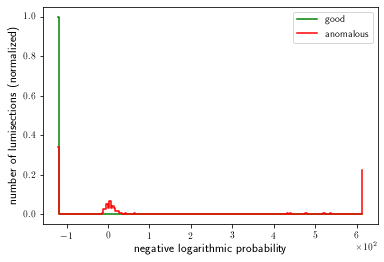

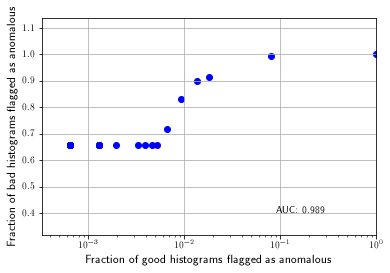

Selected logprob threshold of 122.3
Accuracy: 0.9132853403141361
Precision: 0.8522030117122141
Recall: 1.0
F1-Measure: 0.9202047576031316


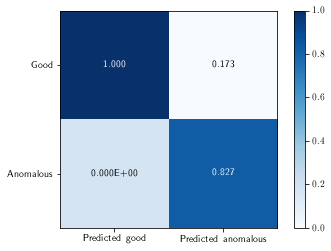

In [51]:
logprob_threshold = evaluate_autoencoders_combined(logprob_good, logprob_bad)

Average MSE on good set: 7.480834138648308e-07
Average MSE on bad set: 7.559144839673924e-07
Examples of good histograms and reconstruction:


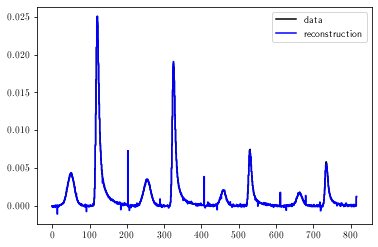

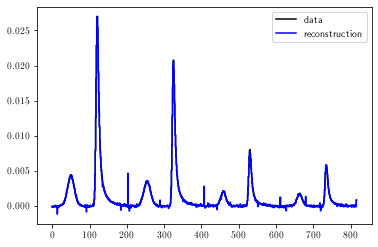

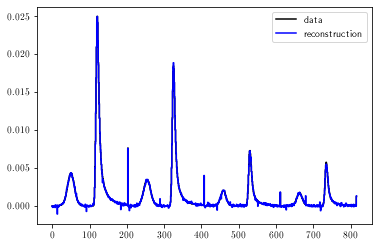

Examples of bad histograms and reconstruction:


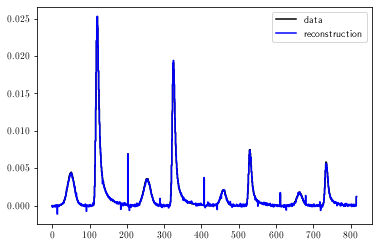

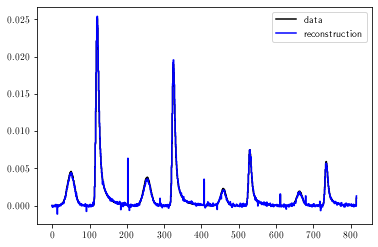

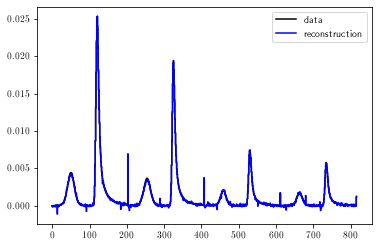

Selected working point: 3.915535051280805e-09
0.5
0.5
1.0
0.6666666666666666
Average MSE on good set: 4.6150152442400894e-07
Average MSE on bad set: 8.568980886361166e-07
Examples of good histograms and reconstruction:


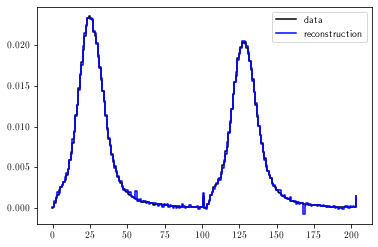

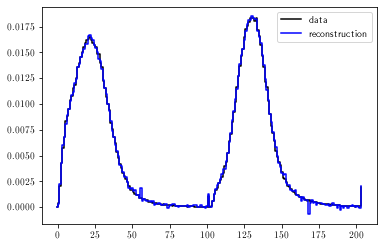

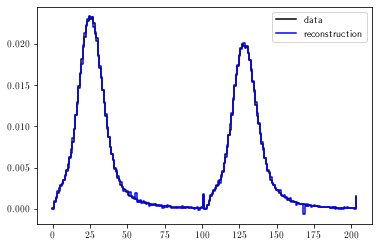

Examples of bad histograms and reconstruction:


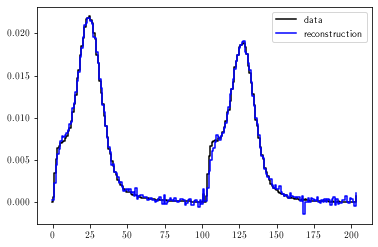

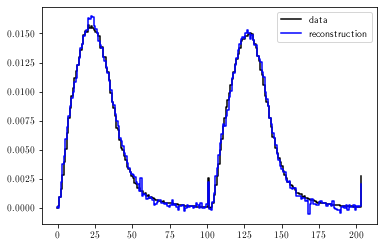

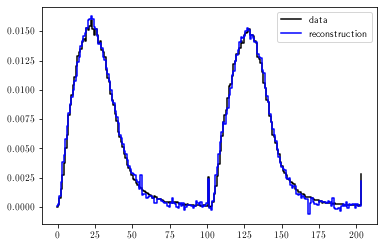

Selected working point: 1.9769828210605384e-07
0.5
0.5
1.0
0.6666666666666666
Average MSE on good set: 2.376033464787536e-07
Average MSE on bad set: 4.351966218769351e-06
Examples of good histograms and reconstruction:


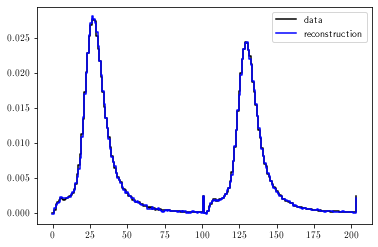

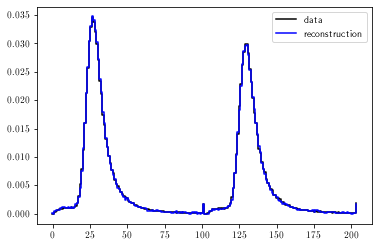

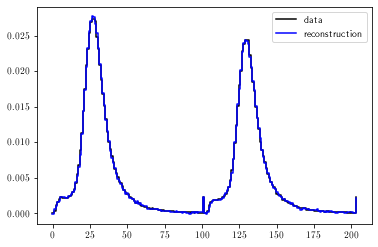

Examples of bad histograms and reconstruction:


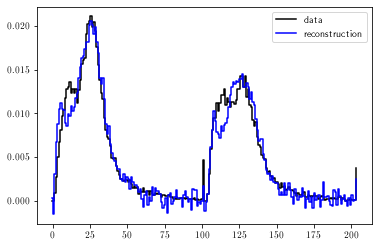

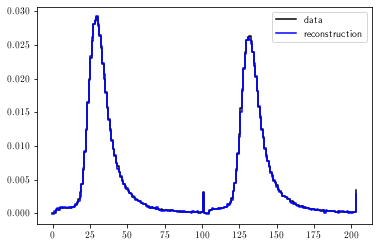

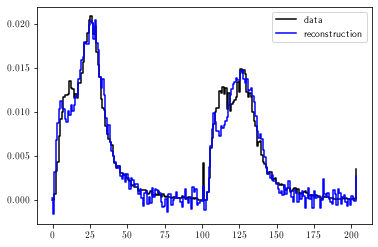

Selected working point: 2.0571814361452987e-06
0.7350427350427351
1.0
0.4700854700854701
0.6395348837209301
Average MSE on good set: 6.234429672089354e-07
Average MSE on bad set: 2.7324533007925497e-05
Examples of good histograms and reconstruction:


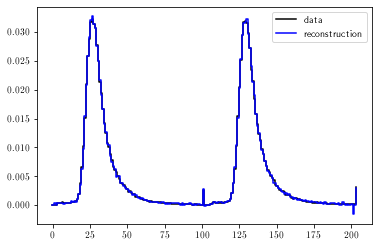

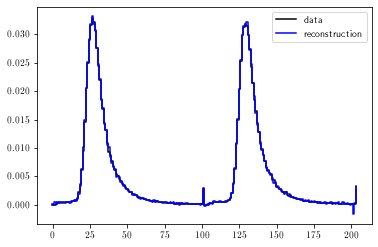

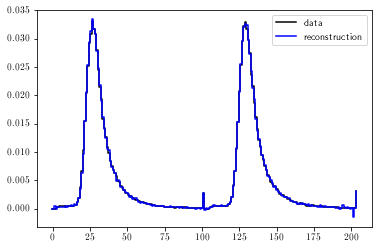

Examples of bad histograms and reconstruction:


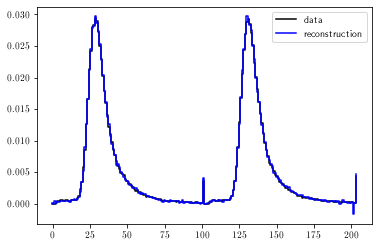

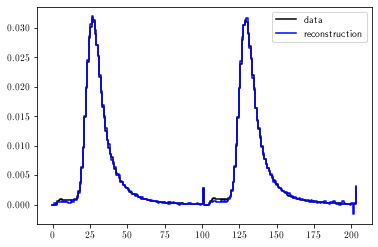

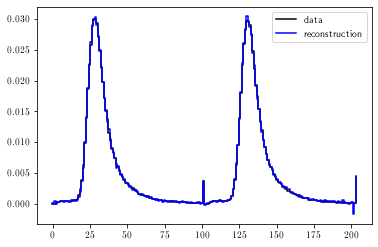

Selected working point: 1.3350545020358281e-05
0.594017094017094
1.0
0.18803418803418803
0.31654676258992803
Average MSE on good set: 4.922880852187322e-07
Average MSE on bad set: 2.0812865163523786e-05
Examples of good histograms and reconstruction:


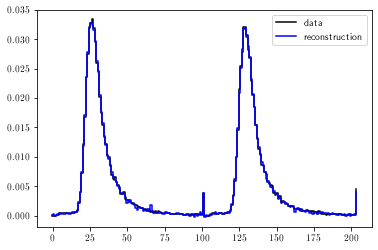

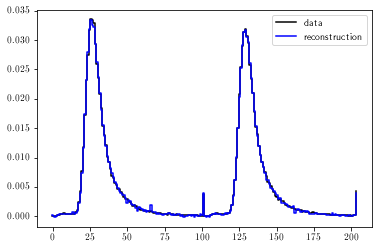

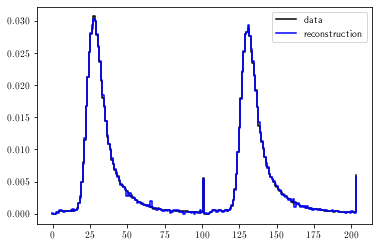

Examples of bad histograms and reconstruction:


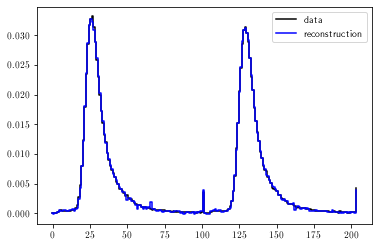

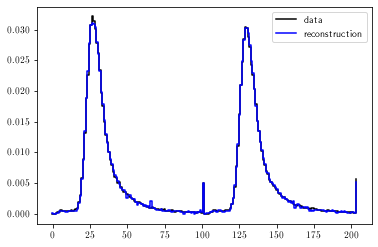

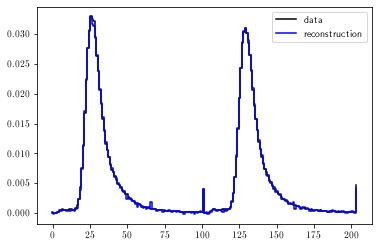

Selected working point: 1.0160288539152526e-05
0.594017094017094
1.0
0.18803418803418803
0.31654676258992803
Average MSE on good set: 6.189028864267165e-07
Average MSE on bad set: 4.317426797396965e-06
Examples of good histograms and reconstruction:


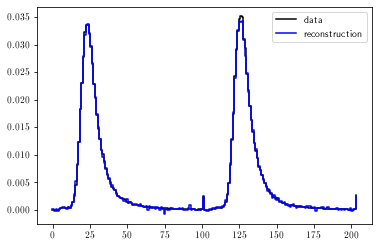

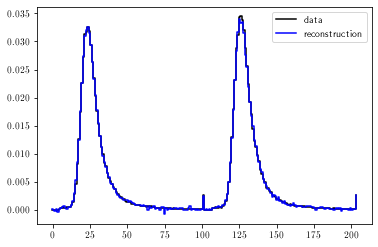

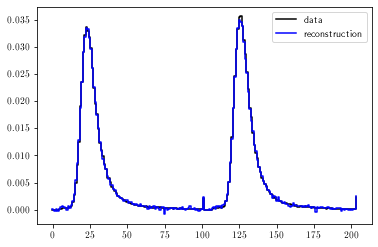

Examples of bad histograms and reconstruction:


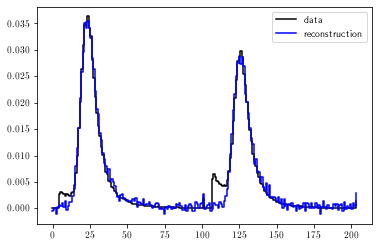

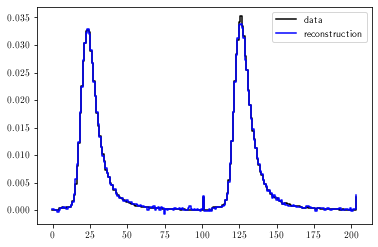

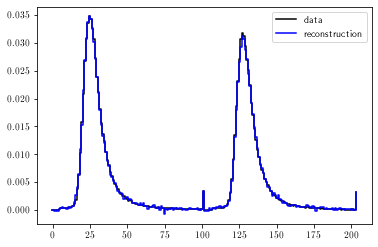

Selected working point: 1.8492619554851241e-06
0.594017094017094
1.0
0.18803418803418803
0.31654676258992803
Average MSE on good set: 3.401848426438808e-07
Average MSE on bad set: 2.145137865873727e-06
Examples of good histograms and reconstruction:


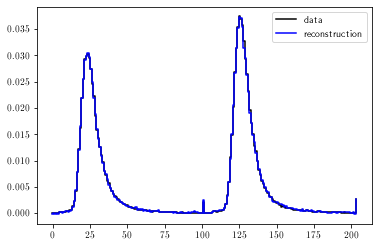

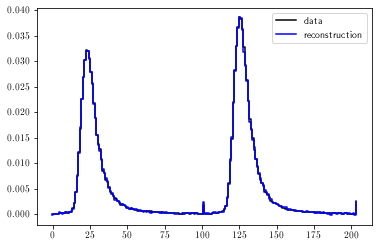

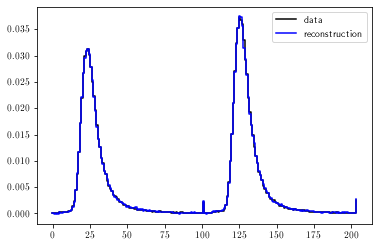

Examples of bad histograms and reconstruction:


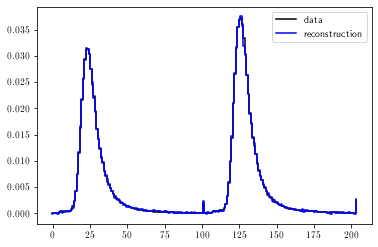

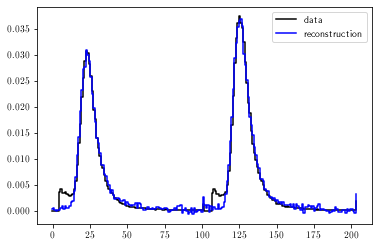

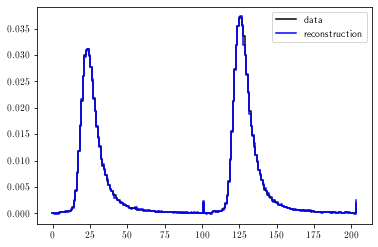

Selected working point: 9.02476511614923e-07
0.593689868886204
0.9965315862804969
0.18803418803418803
0.3163724830477768
Average MSE on good set: 2.9388415557080467e-07
Average MSE on bad set: 3.912777121209473e-06
Examples of good histograms and reconstruction:


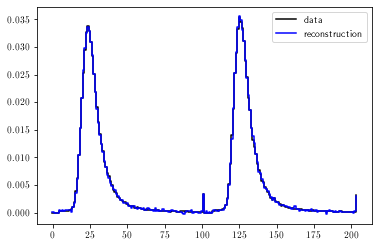

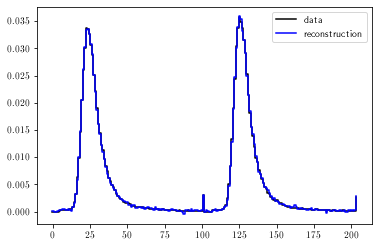

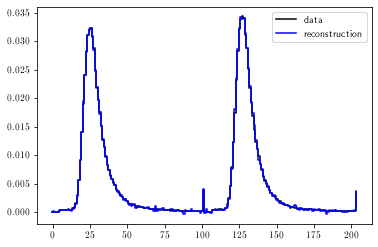

Examples of bad histograms and reconstruction:


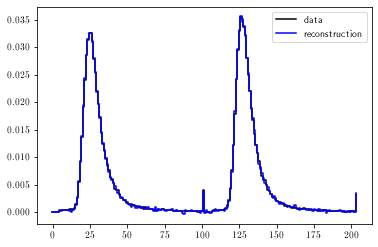

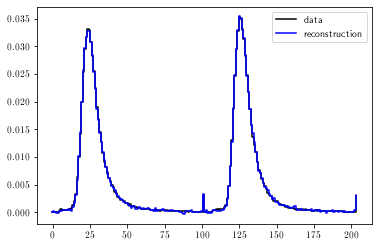

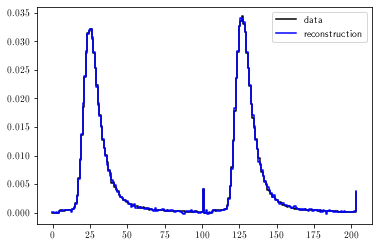

Selected working point: 1.8094464828193344e-06
0.594017094017094
1.0
0.18803418803418803
0.31654676258992803
Average MSE on good set: 8.242077666897871e-07
Average MSE on bad set: 8.041694303253455e-07
Examples of good histograms and reconstruction:


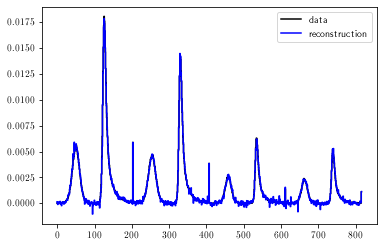

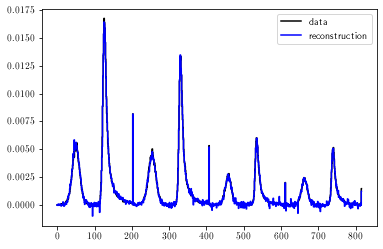

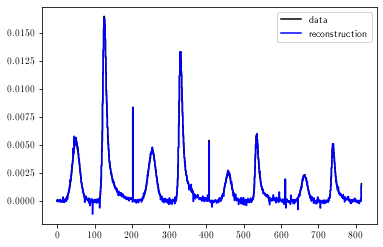

Examples of bad histograms and reconstruction:


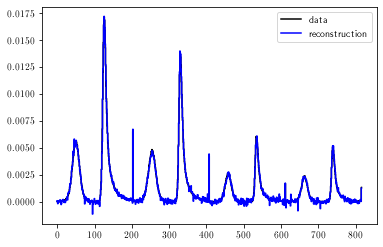

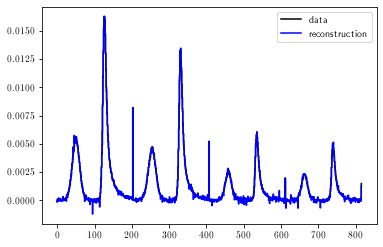

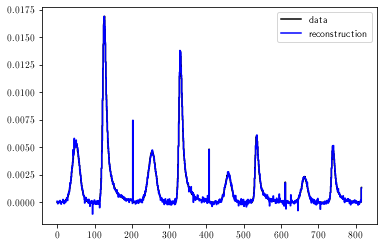

Selected working point: -1.0019168182220801e-08
0.5
0.5
1.0
0.6666666666666666


In [25]:
msewps = evaluate_autoencoder_individual(histstruct)